In [1]:
import ROOT, rat
import os, sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
sys.path.append('/home/jp/projects/python_tools')
import jp_mpl as jplot


TClass::TClass:0: RuntimeWarning: no dictionary for class omtext is available


In [2]:
import rat

In [4]:
elist = []
ratreader = rat.dsreader('/home/jp/projects/snoplus/rundir/stored_photon_info/5MeV_electrons_storeall.root')
for ds, run in ratreader:
    mymc = ds.GetMC()
    for pmt_index in range(mymc.GetMCPMTCount()):
        mypmt = mymc.GetMCPMT(pmt_index)   
        for photon_index in range(mypmt.GetMCPhotonCount()):
            elist.append(mypmt.GetMCPhoton(photon_index).GetEnergy())
ratreader.close()

In [34]:
elist = np.array(elist) #This is all in MeV

In [35]:
hcvalue = 1.239841 # eV*um (electronvolts times micrometer)

In [40]:
# Energy to wavelength
wavelengths = 1E+3*hcvalue/(elist*1E+6)

/home/jp/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


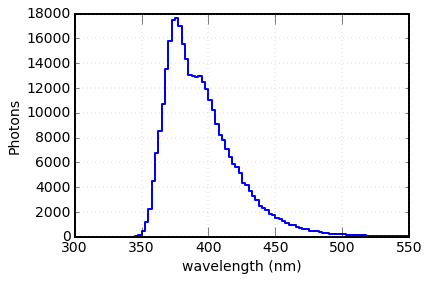

In [46]:
# Making a histogram
xaxis = np.linspace(300, 550, 101)
n, x = np.histogram(wavelengths, xaxis)
jplot.unfilledBar(xaxis, n)
plt.xlabel('wavelength (nm)')
plt.ylabel('Photons')
